In this notebook, a simple example of usage of the adaptiveDesignProcedure is shown. The example reproduces the "Showcase of the procedure" from M. Bracconi and M. Maestri, "Training set design for Machine Learning techniques applied to the approximation of computationally intensive first-principles kinetic models", Chemical Engineering Journal, 2020, DOI: 10.1016/j.cej.2020.125469

First, it is necessary to import the adaptiveDesignProcedure module along with the numpy library

In [1]:
import numpy as np
import adaptiveDesignProcedure as adp

Then, the adaptiveDesignProcedure requires as input a general function which provides the values employed in the tabulation.
In this example, the tabulated function is the following:
$$ y(x) = \frac{1}{x\cdot(1+\exp{(-u\cdot(x-0.5)})}+1$$
where $ u = 150 $
The function is built as follows:

In [2]:
def getRate(x):
    """Compute the function value 
        
        Parameters
        ----------
            x : np.array[number records, number input variables]
                Input data
            
        Return
        ----------
            y : np.array[number records, number tabulation variables]
                Function values
                
    """
    x = x.reshape(-1,1)

    u = 150
	
    y = 1/(1+np.exp(-u*(x-0.5)))*(1/(x**1))+1
    return y.reshape(-1,1)

Now, it is necessary to properly setup the parameters of the adaptiveDesignProcedure.
First, some input/output file names have to be defined. They are related to the path of the final training dataset (trainingFile), to the path of the final ExtraTrees generated by the procedure (forestFile). Optionally, it is possible to define the path to the benchmark dataset. This external dataset is employed to cross-validate the final ExtraTrees. In particular, it is possible to define the path the query file (queryFile) and to the position of the corresponding function values (queryRest)

In [3]:
# Files (input, training, query and benckmark)
trainingFile    = 'train.dat'
forestFile      = 'ml_ExtraTrees.pkl'
# Optional
queryFile       = 'query_input.dat'
queryRest       = 'query_output.dat'

The adaptiveDesignProcedure requires the definition of a set of additional parameters related to the ExtraTrees and to the algorithm itself. Additional information on the meaning of the params can be found in the docs or in the paper.

In [4]:
# Forest paramters
forestParams={
        'Ntree'       : 200,
        'tps'         : 1,
        'fraction'    : 0.9,
    }

# Algorithm paramters
algorithmParams={
        'dth'         : 0.1,     # thresold first derivative
        'd2th'        : 0.9,     # thresold second derivative
        'VIth'        : 0.15,    # thresold variable importance
        'errTh'       : 1e-6,    # thresold for MRE error evaluation (remove from MRE calculation record below this value)
        'OOBth'       : 0.01,    # termination criterium on OOBnorm
        'RADth'       : 15,      # termination criterium on Relative Approximation Error (RAD) [%]
        'maxTDSize'   : 40000,   # maximum allowed size of the training data
        'AbsOOBTh'    : 0.2,     # maximum variations between OOB for two different tabulation variables
    }

Now, the descriptors and the function output have to be identfied along with the definition of their params. First, the descriptors (i.e., independent variables) have to be considered. In this example, we have a monodimensional function ($y$) which depends on a single variable ($x$).
For each descriptors, it is necessary to define the variable name, the investigated range (e.g., $[min,max]$), the number of points at the beginning ($num$) and the mean of tabulation (i.e., through linear, inverse or logarithmic scale).
For each tabulated variable, it is necessary to define the variable name and the mean of tabulation (i.e., through linear, inverse or logarithmic scale).

In [5]:
# Independent variables (i.e., descriptors)
input_var = ( { 'name' : 'x', 'min' : 1e-3, 'max' : 1, 'num' : 4, 'typevar' : 'lin'}, )
            
# Tabulated variables
tabulation_var = (  {'name' : 'y', 'typevar' : 'lin'}, )

The adaptiveDesignProcedure enviroment is now set and the procedure object can be constructed by providing the descriptors and tabulated variables dictionaries, the file paths, the algorithm and forest params, the function which computes the variable values.

In [6]:
# Initialize ADPforML class
adpML = adp.adaptiveDesignProcedure(input_var, 
                                    tabulation_var, 
                                    forestFile, 
                                    trainingFile, 
                                    forestParams, 
                                    algorithmParams, 
                                    getRate,
                                    queryFile, 
                                    queryRest,
                                    plot = False)


------ Adaptive generation of Training Data for Machine Learning ------

Input parameters:
  * Forest file: ml_ExtraTrees.pkl
  * Training file: tmp/train.dat
  * Figure path: figures

  * Forest parameters:
    {
        Ntree: 200
        tps: 1
        fraction: 0.9
    }

  * Algorithm parameters:
    {
        dth: 0.1
        d2th: 0.9
        VIth: 0.15
        errTh: 1e-06
        OOBth: 0.01
        RADth: 15
        maxTDSize: 40000
        AbsOOBTh: 0.2
    }


  * Variables information:
    {
        name: x
        min: 0.001
        max: 1
        num: 4
        typevar: lin
    }


  * Tabulation information:
    {
        name: y
        typevar: lin
    }


Optionally, it is possible to generate a benchmark dataset for the cross-validation. To do so, the number of queries has to be defined and the adaptiveDesignProcedure function has to be invoked 

In [7]:
# Number of benchmark query points
query_p = 1000
# Create benchmark dataset (optional)
adpML.createBenchmarkDataset(query_p)


 * Create Benchmark Dataset


Now, it is time to generate the training dataset through the adaptiveDesignProcedure!


------------------ Iterative Species Points Addition ------------------

  * Tabulation Variables: y

    * Iteration:  0
      --------------------------- 
      Points per species: 4
      ---------------------------
      Total number of points:  4

      MK solved in 0.0009760856628417969

      Approximation quality:
          Out-Of-Bag error     :  0.21675010721293395

      Benchmark calculations:
          Av. Benchmark error (MRE):  20.22405024725034 %
          Max. Benchmark error     :  59.90945188187746 %

    * Iteration:  1
      Normalized variable importance: 1.0
      --------------------------- 
      Points per species: 6
      ---------------------------
      Total number of points:  6
      New points            : 2 

      MK solved in 0.00018548965454101562

      Approximation quality:
          Out-Of-Bag error     :  0.08898228898934477
          Iterative approx err :  15.633236473395407 %

      Benchmark calculations:
          Av. Benchmark error (MRE)

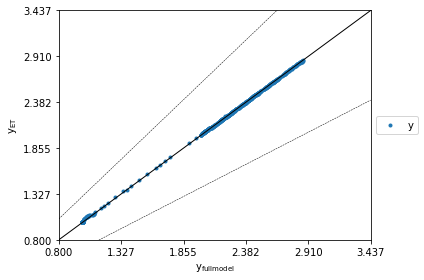

In [8]:
# Create training and RF
adpML.createTrainingDataAndML()

The adaptiveDesignProcedure generated the training dataset and the final ExtraTrees which can be now employed for the accurate approximation of the target function. 